In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

LOADING THE DATASET USING THE .READ_CSV

In [10]:
df_Churn = pd.read_csv(r"C:\Users\User\Downloads\archive\churn_data.csv")


In [9]:
df_Internet = pd.read_csv(r"C:\Users\User\Downloads\archive\internet_data.csv")


In [8]:
df_Customer = pd.read_csv(r"C:\Users\User\Downloads\archive\customer_data.csv")


THE DATASETS ARE DIVIDED INTO 3 FILES; THEREFORE WE NEED TO JOIN THESE DATASETS TOGETHER USING THE "JOIN" STATEMENT

In [6]:
#Merging Data
df_1 = pd.merge(df_Churn, df_Internet, how='inner',on='customerID')

In [7]:
df = pd.merge(df_1, df_Customer, how = "inner", on = "customerID")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns:{df.shape[1]}")

Number of rows: 7042
Number of columns:21


NEXT, WE NEED TO KNOW THE FEATURES IN OUR DATASET, WE DISPLAY THE FIRST 5 COLUMNS USING THE .HEAD() COMMAND

In [11]:
df.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


Now from the dataset, some of the columns that are of impoartance for this analysis includes:

1) The customers' Demographics

2) The Mode of payment

3) The Internet sevice a user is subscribed to

4) The type of contract the user is subscribed to.

EXPLORATORY DATA ANALYSIS

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   MultipleLines     7042 non-null   object 
 10  InternetService   7042 non-null   object 
 11  OnlineSecurity    7042 non-null   object 
 12  OnlineBackup      7042 non-null   object 
 13  DeviceProtection  7042 non-null   object 
 14  TechSupport       7042 non-null   object 
 15  StreamingTV       7042 non-null   object 
 16  StreamingMovies   7042 non-null   object 


from the information below, the dataset consist both Numerical and categorical attributes

In [13]:
#Next, check for Null to ensure the Data Quality, Integrity and suitability
df.isnull()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

The Result above shows that our data does not consist Null Values

NEXT, We Drop Some Columns That Are Irrelevant To The Analysis.
The Column "customerID" is an identifier and it does not containing useful information for the analysis. Hence, it would be dropped

In [15]:
df.drop(["customerID"], axis=1, inplace=True)
df.head(3)

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No


After dropping a column, duplictaes features might have been inadvertently introduced, because there are other columns that contain identical or highly correlated information. Identifying and removing these duplicates keeps the data consistent and prevents redundancy.

In [16]:
df.duplicated().sum()

np.int64(22)

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

There are no more duplicates in our dataset

IDENTIFY UNIQUE VALUES

In order to gain insight on the distribution and diversity of data, it is important that we identify the number of unique features in a dataset.

In [18]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

PhoneService : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
TotalCharges : ['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8', '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25', '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3', '1530.6', '4749.15', '30.2', '6369.45', '1093.1', '6766.95', '181.65', '1874.45', '20.2', '45.25', '7251.7', '316.9', '3548.3', '3549.25', '1105.4', '475.7', '4872.35', '418.25', '4861.45', '981.45', '3906.7', '97', '144.15', '4217.8', '4254.1', '3838.75', '1426.4', '1752.65', '633.3', '4456.35', '1752.55', '6311.2', '7076.35', '894.3', '7853.7', '4707.1', '5450.7', '2962', '957.1', '857.25', '244.1', '3650.35', '2497.2', '930.9', '887.35', '49.05', '1090.65', '7099', '1424.6', '177.4', '6139.5', '2688.

From the result above, we see that TotalCharges has a lot of unique values. Therefore TotalCharges should not be identified as a categorical variable. The Next task ahead is how TotalCharges datatype will be changed from an object to float

In [ ]:
# There happen to be some columns with missing value, we fill that up with the median of the column

# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric (this will turn any invalid string to Nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Now we fill missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
 

In [22]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [23]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

PhoneService : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
gender : ['Female', 'Male']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']


The TotalCharge Column is now a numerical feature 

The values of OnlineSecurity, MultipleLines, OnlineBackup, Device Protection, TechSupport, StreamingTV and StreamingMovies, ["No" and "No Internet service"] means the same thing. Hence, we replace the "No Internet Service" with "No"

In [24]:
#Replace some columns data with the appropriate response
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['Contract'] = df['Contract'].replace('Month-to-month', 'Monthly')
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'Bank transfer')
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'Credit card')
df['InternetService'] = df['InternetService'].replace('No', 'Not-Subscribed')

In [25]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
  'StreamingTV','StreamingMovies']] = df[['OnlineSecurity','OnlineBackup','DeviceProtection',
                                        'TechSupport','StreamingTV','StreamingMovies']].replace('No internet service', 'No')

In [26]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

PhoneService : ['No', 'Yes']
Contract : ['Monthly', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card']
Churn : ['No', 'Yes']
MultipleLines : ['No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'Not-Subscribed']
OnlineSecurity : ['No', 'Yes']
OnlineBackup : ['Yes', 'No']
DeviceProtection : ['No', 'Yes']
TechSupport : ['No', 'Yes']
StreamingTV : ['No', 'Yes']
StreamingMovies : ['No', 'Yes']
gender : ['Female', 'Male']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']


The Dataset is now free of abnormalities, Hence, we proceed with further analysis

EXPLANATORY DATA ANALYSIS (EDA)

What are the key factors influencing customer churn?

<Figure size 1000x600 with 0 Axes>

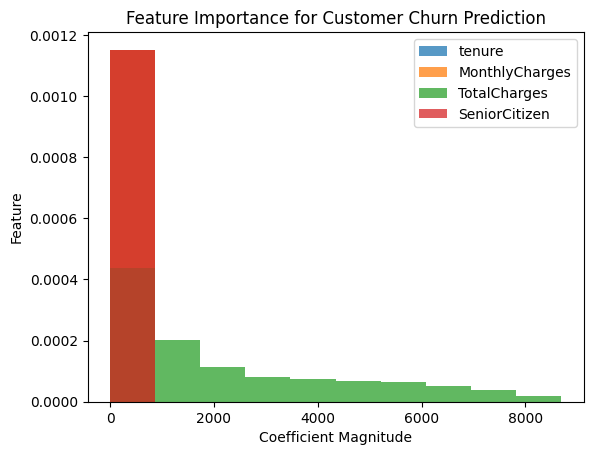

In [27]:
# Plot feature importance
#feature_importance = (df.coef_[0], index=df.columns)
#sorted_importance = df.sort_values(ascending=False, )
df_sort = df.sort_values(by='Churn').reset_index(drop=True)

plt.figure(figsize=(10, 6))
df_sort.plot(kind='hist', density=True, alpha=0.75)
plt.title('Feature Importance for Customer Churn Prediction')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

From the graph above, the key features influencing customer churn rate are Senor Citizens, tenure, MonthlyCharges, and TotalCharges. With the monthly charges having the highest effect, it is recommended that telecom service providers should offer tiered pricing plans based on usage patterns.

What is the distribution of customer churn across different contract types?

<Axes: ylabel='proportion'>

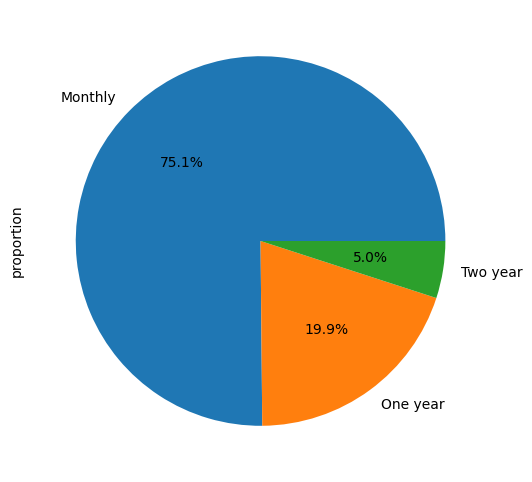

In [28]:
Churn_by_Contract = df.groupby('Contract')['Churn'].value_counts(normalize=True)[:, 'Yes'] * 100  # Convert to percentage

# Visualize churn distribution using a pie chart
plt.figure(figsize=(8, 6))
Churn_by_Contract.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)

Customers with monthly contract have the highest distribution of churn.

In order to prevent this,

1) there is a need to clearly communicate the value incentive of a 1-year and 2-years contract.

2) Implement incentives for customers with monthly-contract type to upgrade to a long-term contract

What is the distribution of customer churn across different payment methods?

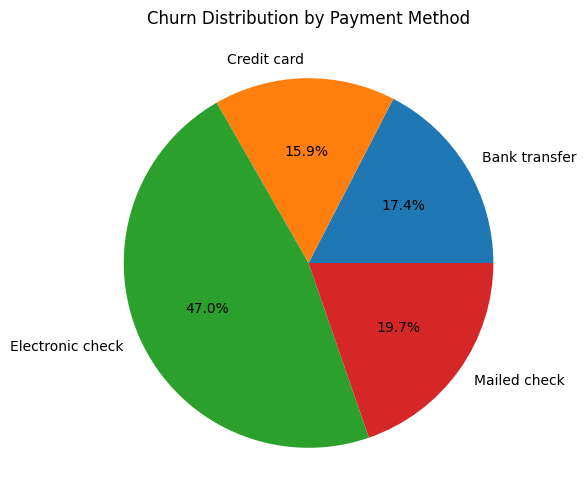

In [29]:
# Calculate churn distribution across payment methods
churn_by_payment_method = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)[:, 'Yes'] * 100 

# Visualize churn distribution using a pie chart
plt.figure(figsize=(8, 6))
churn_by_payment_method.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Churn Distribution by Payment Method')
plt.ylabel('')
plt.show()

Customers who uses the Electronic check payment method are more probable to churn

Hence it is recommended that service providers promote alternative payment method, like credit card among users, by offering incentives to users who switch from Electronic check.

Based on the historical data, How accurately can we predict which customers are likely to churn?

In [30]:
# Calculate overall churn rate and convert it to a percentage
churn_count = df['Churn'].value_counts(normalize=True) * 100  
churn_count

Churn
No     73.547009
Yes    26.452991
Name: proportion, dtype: float64

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

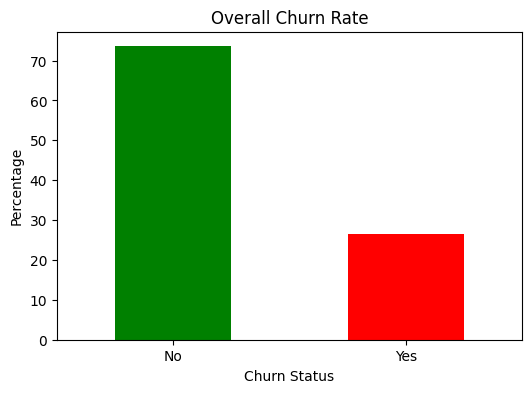

In [31]:
# Visualizing the  overall churn rate
plt.figure(figsize=(6, 4))
churn_count.plot(kind='bar', color=['green', 'red'])
plt.title('Overall Churn Rate')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

74% of customers will not churn, only about 26% of the customers will churn

What are the demographics of customers who churned compared to those who did not?

In [32]:
# Calculate demographics for customers who churned
#churned_customers = df[df['Churn'] == 1]
#churned_demographics = churned_customers.describe()
# Separate customers who churned and those who did not
churned_customers = df[df['Churn'] == 1]
not_churned_customers = df[df['Churn'] == 0]

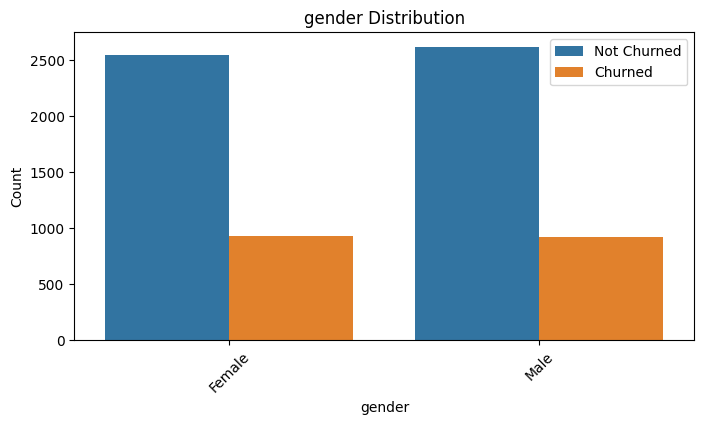

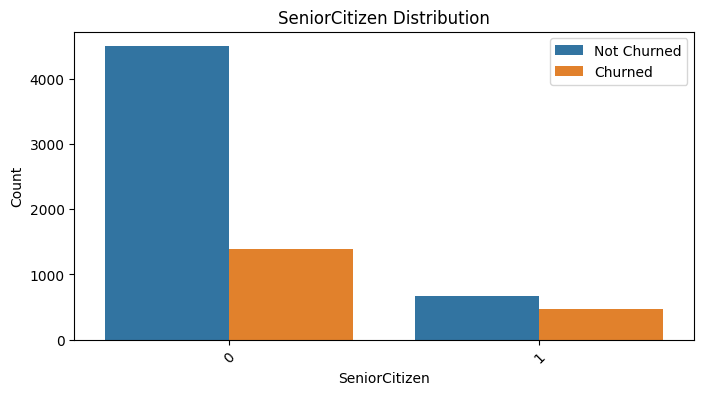

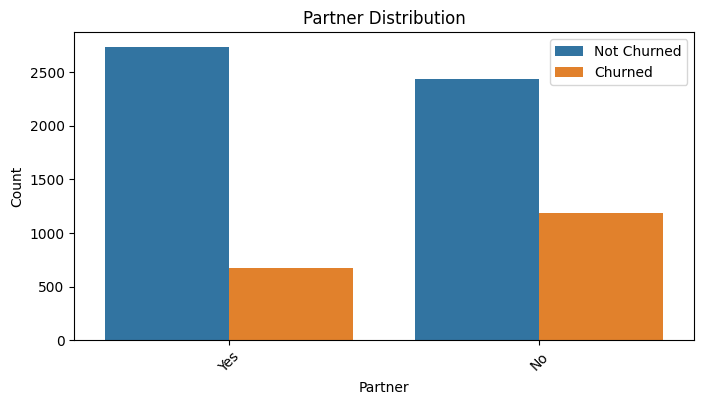

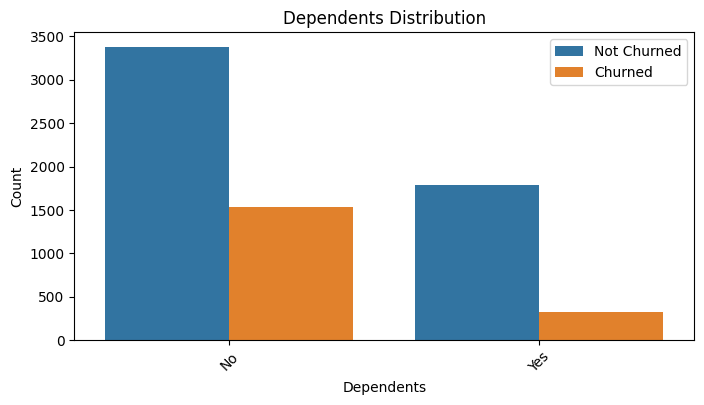

In [33]:
# Calculate demographics for customers who did not churn
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for feature in demographic_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, hue='Churn')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Not Churned', 'Churned'])
    plt.xticks(rotation=45)
    plt.show()

Demographics of customers who churned the most: Non Senior Citizens Is not associated with a partner Is not a dependant From these demographics, the following are recommended to be implemented by the service provider: 
1) Provide support, dedicated specifically to the needs of senior citizens, example include specialized agents trained to assist old customers 

2) Offer referral bonus that incentivize multiple customers to subscribe to the service together.

3) Sponsor events or host informational sessions in communities in order to foster goodwill and loyalty

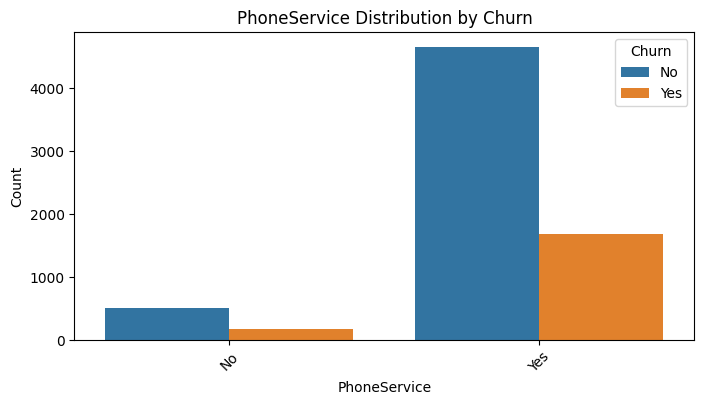

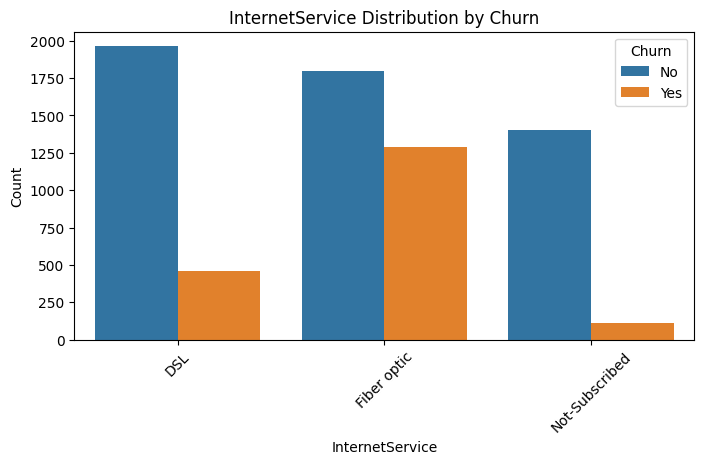

In [34]:
# Plot demographics comparison
demographic_variables = ['PhoneService', 'InternetService']

for var in demographic_variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'{var} Distribution by Churn')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

From the graph, phoneservice users and Fibre Optic Internet service Users have a high probability of churning. Therefore the following is recommended:
1) Enhance the quality and reliablilty of phone services and fibre optic
2) Offer bundle service package that combine phone service and fibre optic at a discounte rate
3) Incentives like faster internet speed, unlimited call plans should be used to entice customers to upgrade their subscription

What actions can telecom companies take to proactively reduce churn and retain customers?


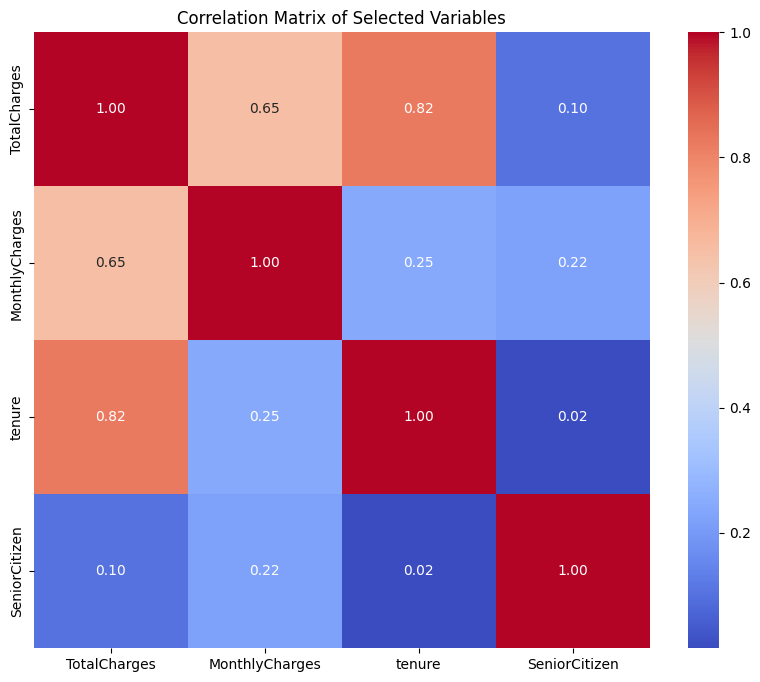

In [35]:
# Select relevant columns
selected_columns = ['TotalCharges', 'MonthlyCharges', 'tenure', 'SeniorCitizen']
selected_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

TotalCharges and Tenure are highly correlated. In order to understand how the correlation between these 2 variables reduces customer churn rate, we need to analyze the relationship between these variables and the target variable 'Churn'.

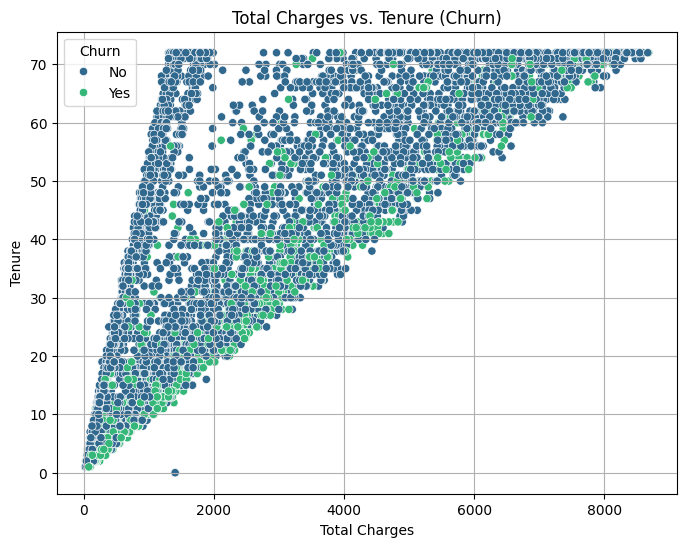

In [36]:
# Analyze the relationship between monthly charges, total charges, and churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df, palette='viridis')
plt.title('Total Charges vs. Tenure (Churn)')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.legend(title='Churn')
plt.grid(True)
plt.show()

The correlation between Total Charges and Tenure of customers can influence the churn rate in the following ways: 
1) Higher Total Charges overtime can indicate that customers are deriving values from the services rendered.
2) Customers that have been with the company for a longer tenure, having accured higher total charges may preceive the cost of switchubg to a different provider as more significant. Therefore, they will be less inclined to churn due to the expense of transitioning to a new service provider
3) There is more time to build a relationship with customers as their tenure increases.These realtionship can foster loyalty and trust, reducing the likelihood to churn.

Based on the correlation, the service provider can take the following actions: 1) Introduce valued added services that caters to the prefrence of long tenure customers 2) Implement customer recognition programs, acknowledging and rewarding long-tenured customers with higher total charges.

Are there seasonal or temporal patterns in churn behavior, and how can telecom companies adjust their strategies accordingly?

C:\Users\User\AppData\Local\Temp\ipykernel_10776\1491504784.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_tenure = df.groupby(tenure_bins)['Churn'].value_counts(normalize=True) * 100


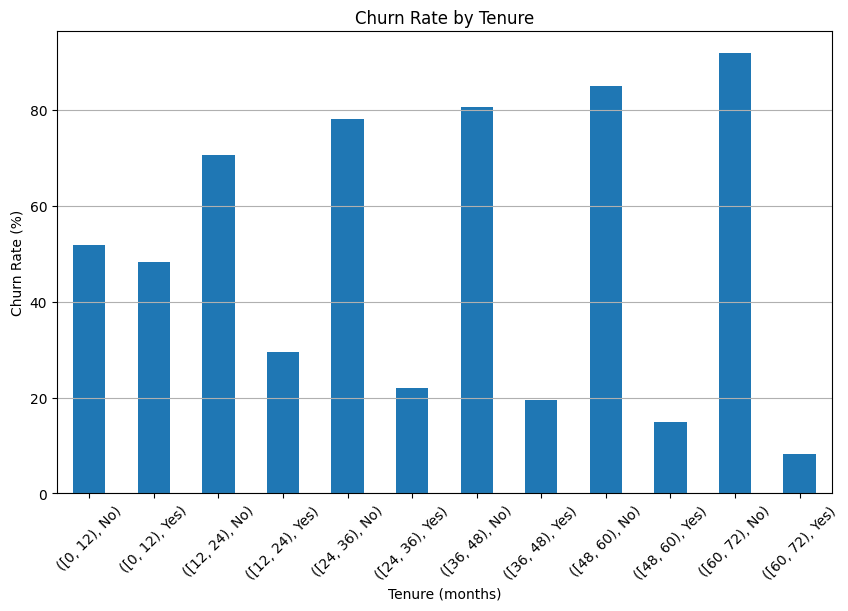

In [37]:
# Create bins for tenure in months
tenure_bins = pd.cut(df['tenure'], bins=range(0, df['tenure'].max() + 12, 12), right=False)

# Group data by tenure bins and calculate churn rates
churn_rate_by_tenure = df.groupby(tenure_bins)['Churn'].value_counts(normalize=True) * 100 

# Visualize churn rates over tenure
plt.figure(figsize=(10, 6))
churn_rate_by_tenure.plot(kind='bar')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The graph allows us to observe how churn rates vary depending on the duration of the customer's subscription.From the graph, we can see that the churn rate decreases as the customer tenure is incresaed. Therefore telecom should offer retention incentives to customers whose tenure is below 12 months.


DICUSSION AND CONCLUSION
The Explanatory Data Analysis (EDA) offers valuable insights into the factors influencing churn rates and provides a solution for developing effective strategies to retain customers

Strength: 
1) We identified the key factors contributing to customer churn rate 
2) Visualized patterns, trends and correlations within data 
3) Compared variables to develop strategies that reduces churn rate

Limitations: This is a statistical analysis of historical data, Hence we are unable to capture changes in market dynamics or customer behaviour overtime

Insights and Implications: 
1) The analysis revealed the significant contributors to customer churn (SeniorCitizen, tenure, monthly charges, and
TotalCharges). 
2) Understanding the demographics of customers that churn, in order to implemnet targeted retention strategies and marketing
campaigns.

Data-Driven Recommendations: 
1) telecom should offer retention incentives to customers whose tenure is below 12 months 
2) Introduce valued added services that caters to the prefrence of long tenure customers 
3) Offer bundle service package that combine phone service and fibre optic at a discounte rate